In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
import plotly.graph_objects as go
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode,download_plotlyjs,plot,iplot

In [7]:
init_notebook_mode(connected=True)
cf.go_offline()

In [17]:
df =pd.read_csv('projectData/matches.csv')

In [18]:
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [19]:
df['result'].value_counts()

normal       743
tie            9
no result      4
Name: result, dtype: int64

In [25]:
df[df['result']=='tie'].head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
33,34,2017,Rajkot,2017-04-29,Gujarat Lions,Mumbai Indians,Gujarat Lions,bat,tie,0,Mumbai Indians,0,0,KH Pandya,Saurashtra Cricket Association Stadium,AK Chaudhary,CB Gaffaney,NaN
125,126,2009,Cape Town,2009-04-23,Rajasthan Royals,Kolkata Knight Riders,Kolkata Knight Riders,field,tie,0,Rajasthan Royals,0,0,YK Pathan,Newlands,MR Benson,M Erasmus,NaN
189,190,2010,Chennai,2010-03-21,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,field,tie,0,Kings XI Punjab,0,0,J Theron,"MA Chidambaram Stadium, Chepauk",K Hariharan,DJ Harper,NaN
387,388,2013,Hyderabad,2013-04-07,Royal Challengers Bangalore,Sunrisers Hyderabad,Royal Challengers Bangalore,bat,tie,0,Sunrisers Hyderabad,0,0,GH Vihari,"Rajiv Gandhi International Stadium, Uppal",AK Chaudhary,S Ravi,NaN
400,401,2013,Bangalore,2013-04-16,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,tie,0,Royal Challengers Bangalore,0,0,V Kohli,M Chinnaswamy Stadium,M Erasmus,VA Kulkarni,NaN


In [21]:
df[df['result']=='no result']

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
300,301,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker,NaN
545,546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak,NaN
570,571,2015,Bangalore,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan,NaN
744,11340,2019,Bengaluru,30/04/19,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M. Chinnaswamy Stadium,Nigel Llong,Ulhas Gandhe,Anil Chaudhary


In [26]:
df['winner'].isnull().sum()

4

In [27]:
winslost = df[['team1','team2', 'winner']]

In [28]:
winslost.head()

,team1,team2,winner
0,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad
1,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant
2,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders
3,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab
4,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore


In [29]:
winslost['losser'] = winslost.apply(lambda x: (x['team2'] if x['team1']== x['winner'] else x['team1']), axis=1)

In [31]:
winslost.head()

,team1,team2,winner,losser
0,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,Royal Challengers Bangalore
1,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,Mumbai Indians
2,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,Gujarat Lions
3,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,Rising Pune Supergiant
4,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,Delhi Daredevils


In [36]:
wins = winslost['winner'].value_counts()
losser = winslost['losser'].value_counts()

In [37]:
losser

Royal Challengers Bangalore    95
Kings XI Punjab                94
Delhi Daredevils               94
Kolkata Knight Riders          86
Mumbai Indians                 78
Rajasthan Royals               70
Chennai Super Kings            64
Sunrisers Hyderabad            50
Deccan Chargers                46
Pune Warriors                  33
Gujarat Lions                  17
Rising Pune Supergiants         9
Kochi Tuskers Kerala            8
Rising Pune Supergiant          6
Delhi Capitals                  6
Name: losser, dtype: int64

In [42]:
wins.iplot(kind='bar',xTitle = 'Winner',yTitle='Count',title = 'Winner count')

In [43]:
losser.iplot(kind='bar',xTitle = 'losser',yTitle='Count',title = 'losser count')

In [44]:
df.head(1)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN


In [45]:
mom = df['player_of_match'].value_counts()

In [46]:
mom

CH Gayle           21
AB de Villiers     20
RG Sharma          17
DA Warner          17
MS Dhoni           17
                   ..
KMDN Kulasekara     1
MF Maharoof         1
MD Mishra           1
AA Jhunjhunwala     1
S Hetmyer           1
Name: player_of_match, Length: 226, dtype: int64

In [52]:
mom[:20].iplot(kind='bar',xTitle ='Player', yTitle = 'Conut', title = 'Player of the match')

In [54]:
city = df['city'].value_counts()

In [56]:
city

Mumbai            101
Kolkata            77
Delhi              74
Bangalore          66
Hyderabad          64
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Bengaluru          14
Visakhapatnam      13
Ahmedabad          12
Centurion          12
Rajkot             10
Mohali             10
Indore              9
Dharamsala          9
Johannesburg        8
Abu Dhabi           7
Ranchi              7
Port Elizabeth      7
Cape Town           7
Cuttack             7
Sharjah             6
Raipur              6
Kochi               5
Kanpur              4
East London         3
Nagpur              3
Kimberley           3
Bloemfontein        2
Name: city, dtype: int64

In [55]:
city[:20].iplot(kind = 'bar')

In [60]:
stadium = df['venue'].value_counts()

In [62]:
stadium[:20].iplot(kind = 'bar')

In [63]:
def get_micsk(team1,team2):
    teams=['Chennai Super Kings','Mumbai Indians']
    if team1 in teams and team2 in teams:
        return True
    else:
        return False

In [66]:
index = []
for row in df.iterrows():
    flag = get_micsk(row[1]['team1'],row[1]['team2'])
    index.append(flag)

In [67]:
sum(index)

28

In [70]:
micsk = df[index]

In [72]:
micsk.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
66,67,2008,Chennai,2008-04-23,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Chennai Super Kings,6,0,ML Hayden,"MA Chidambaram Stadium, Chepauk",DJ Harper,GA Pratapkumar,NaN
95,96,2008,Mumbai,2008-05-14,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,ST Jayasuriya,Wankhede Stadium,BR Doctrove,AM Saheba,NaN
117,118,2009,Cape Town,2009-04-18,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,normal,0,Mumbai Indians,19,0,SR Tendulkar,Newlands,BR Doctrove,K Hariharan,NaN
161,162,2009,Port Elizabeth,2009-05-16,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,ML Hayden,St George's Park,SK Tarapore,SJA Taufel,NaN
193,194,2010,Mumbai,2010-03-25,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,5,SR Tendulkar,Brabourne Stadium,BF Bowden,AM Saheba,NaN


In [75]:
micsk['toss_decision'].value_counts().iplot(kind='bar')

In [76]:
micsk['toss_winner'].value_counts().iplot(kind='bar')

In [77]:
micsk['winner'].value_counts().iplot(kind='bar')

In [79]:
micsk['player_of_match'].value_counts().iplot(kind='bar')

In [81]:
df.head(1)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN


In [88]:
temp = micsk[['winner','win_by_runs','win_by_wickets']]
temp = temp.set_index('winner')

In [90]:
temp.max()

win_by_runs       60
win_by_wickets     9
dtype: int64

<AxesSubplot:xlabel='winner'>

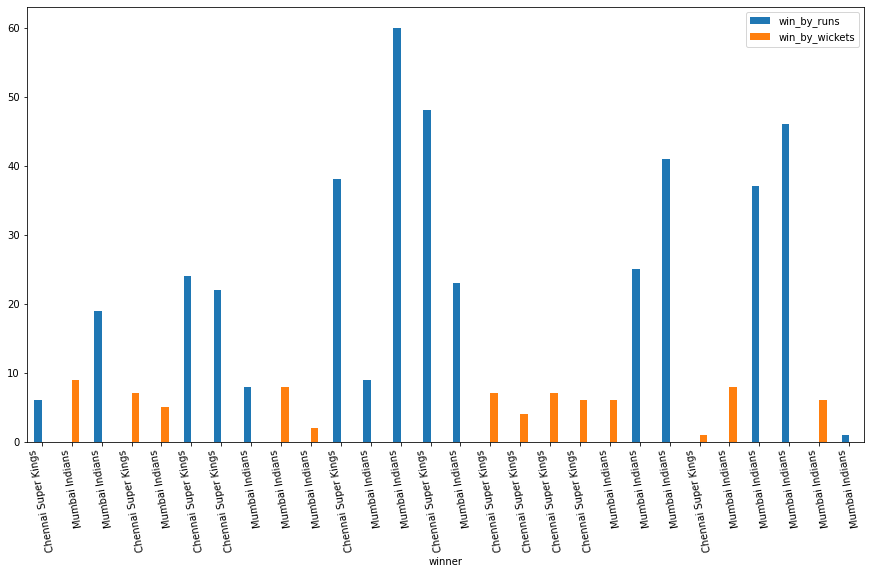

In [93]:
temp.plot.bar(figsize = (15,8),rot =100)

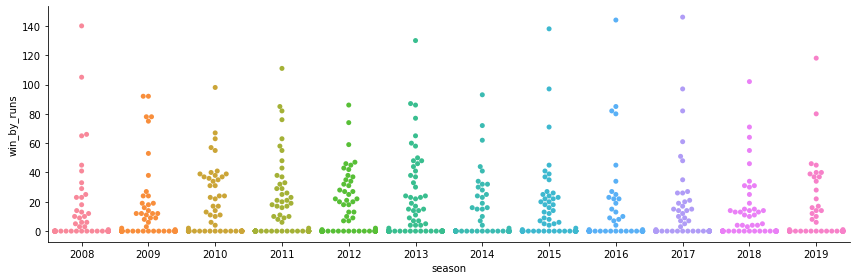

In [100]:
sns.catplot(x = 'season',y ='win_by_runs', kind = 'swarm',data=df, height=4,aspect=3)

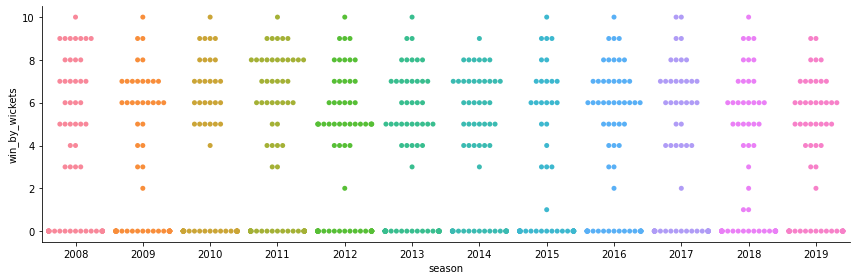

In [102]:
 sns.catplot(x = 'season',y ='win_by_wickets', kind = 'swarm',data=df, height=4,aspect=3)

In [104]:
season = df.groupby('season')['win_by_runs'].max()

In [107]:
season.iplot(kind ='bar')

In [112]:
df1 = pd.read_csv('projectData/deliveries.csv',index_col='match_id')

In [113]:
df1.head()

,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
match_id,,,,,,,,,,,,,,,,,,,,
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [118]:
df1['batsman'].value_counts()[:20].iplot(kind ='bar')

In [120]:
df1['bowler'].value_counts()[:20].iplot(kind ='bar')

In [139]:
df1['non_striker'].value_counts()[:20].iplot(kind ='bar')

In [123]:
df1.columns

Index(['inning', 'batting_team', 'bowling_team', 'over', 'ball', 'batsman',
       'non_striker', 'bowler', 'is_super_over', 'wide_runs', 'bye_runs',
       'legbye_runs', 'noball_runs', 'penalty_runs', 'batsman_runs',
       'extra_runs', 'total_runs', 'player_dismissed', 'dismissal_kind',
       'fielder'],
      dtype='object')

In [124]:
runs = df1.groupby('batting_team').sum()[['batsman_runs','total_runs']]

In [125]:
runs

,batsman_runs,total_runs
batting_team,,
Chennai Super Kings,25104,26418
Deccan Chargers,10885,11463
Delhi Capitals,2530,2630
Delhi Daredevils,23115,24388
Gujarat Lions,4629,4862
Kings XI Punjab,26468,27893
Kochi Tuskers Kerala,1758,1901
Kolkata Knight Riders,25895,27419
Mumbai Indians,28164,29809


In [126]:
runs.iplot(kind='bar')

In [131]:
batsmans = df1.groupby('batsman')['batsman_runs'].sum()
batsmans = batsmans.sort_values(ascending = False)

In [134]:
batsmans[:20].iplot(kind = 'bar')

In [135]:
df1['player_dismissed'].value_counts()[:20].iplot(kind ='bar')

In [136]:
df1['dismissal_kind'].value_counts()[:20].iplot(kind ='bar')